# Assignment - 3
# Name: PRABHATH SAI G B
# Reg No: 20MID0137
# Campus: VIT Vellore

## ----------------------------------------------------------------------------------------------------------------------------------
## Building a Regression Model
## 1. Download the dataset: Dataset

## 2. Load the dataset into the tool.

In [4]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Loading the dataset 
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


## 3. Perform Below Visualizations.

###  Univariate Analysis


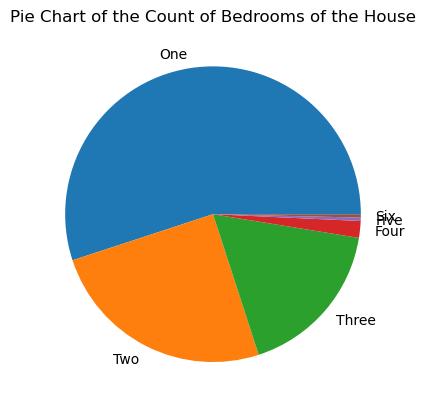

In [18]:
#Pie Chart
pie_chart=data['bedrooms'].value_counts()
label=['One','Two','Three', 'Four', 'Five', 'Six']
pie_chart
plt.pie(pie_chart,labels=label, radius=1)
plt.title('Pie Chart of the Count of Bedrooms of the House')
plt.show()

###  Bi-Variate Analysis

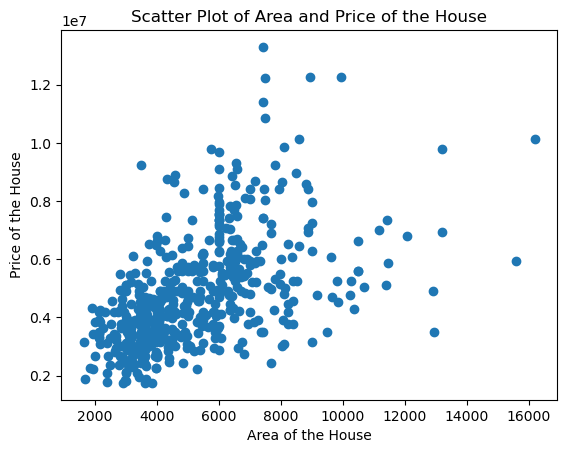

In [14]:
#Scatter Plot
plt.scatter(data['area'], data['price'])
plt.xlabel('Area of the House')
plt.ylabel('Price of the House')
plt.title('Scatter Plot of Area and Price of the House')
plt.show()

###  Multi-Variate Analysis

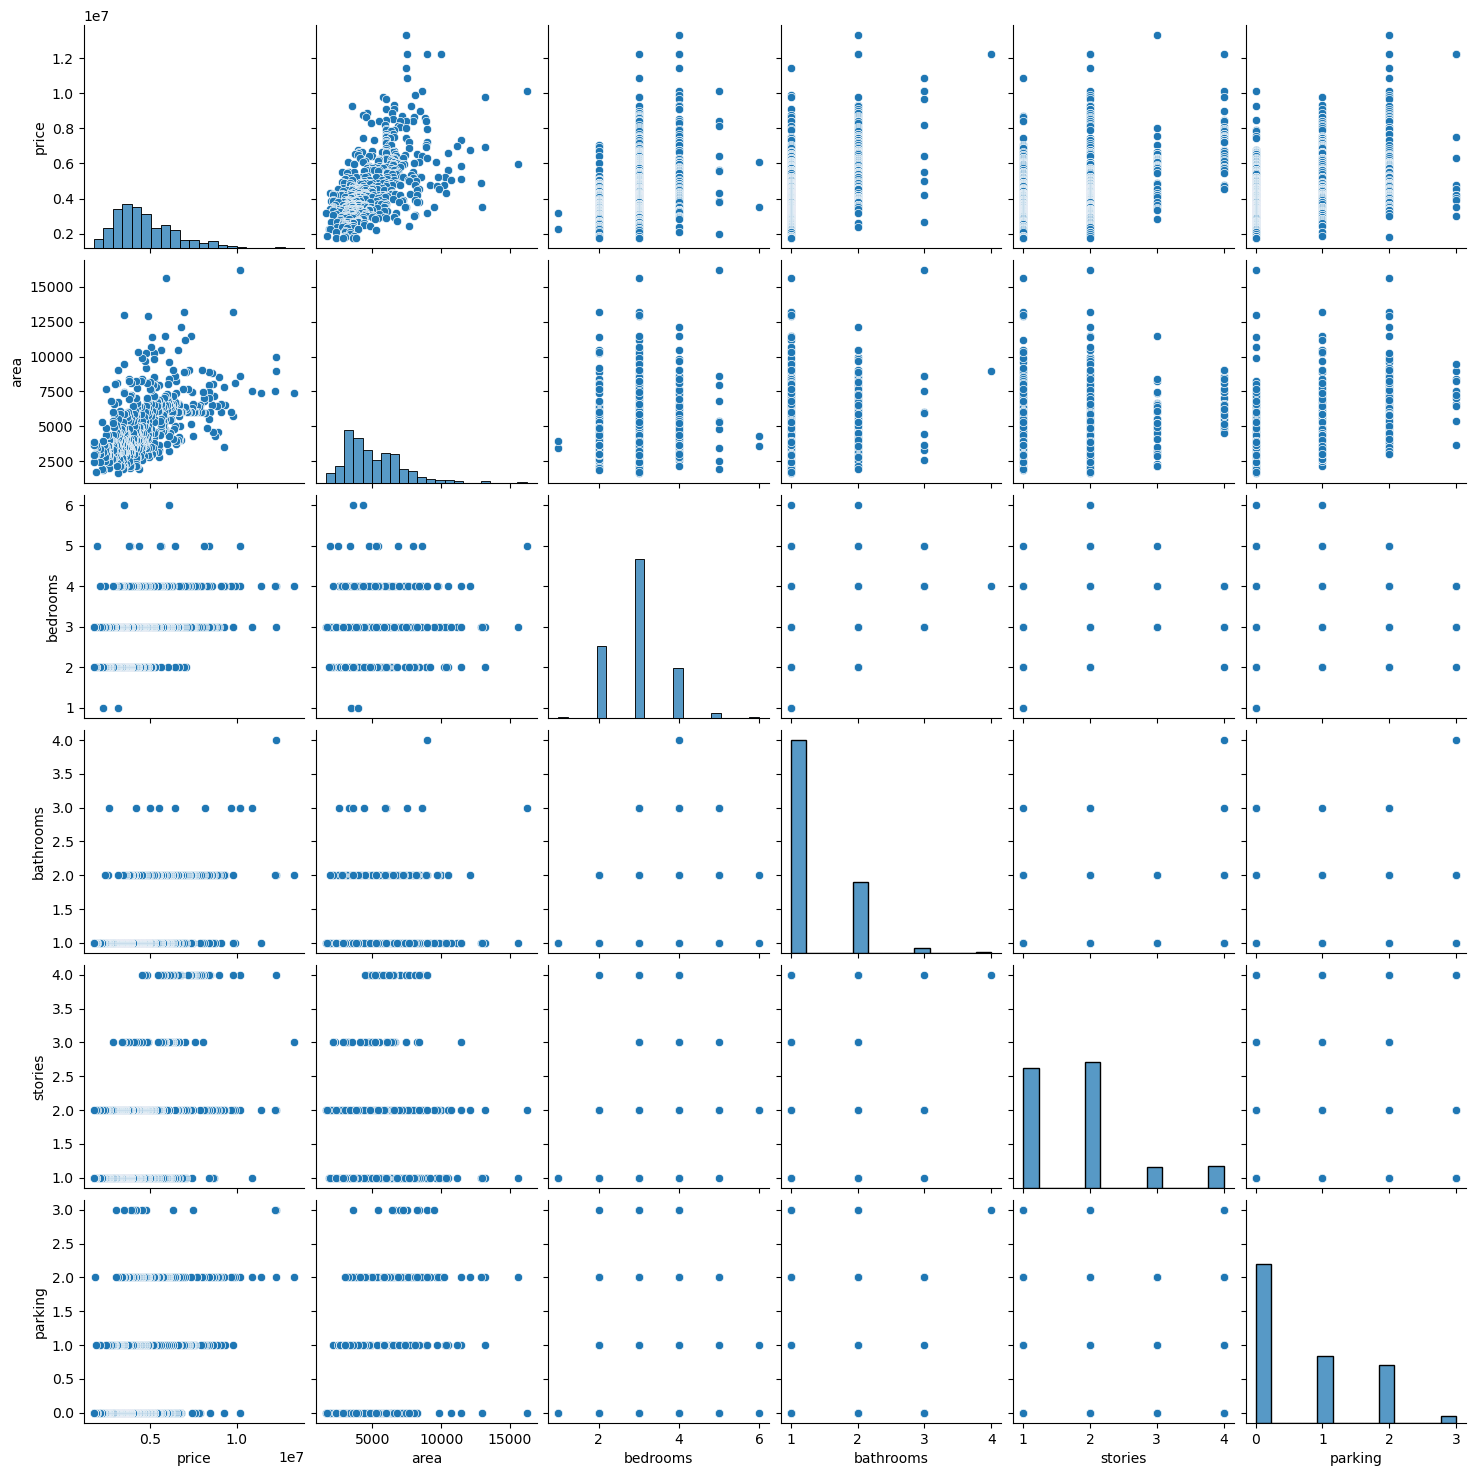

In [21]:
#Pair Plot
import seaborn as sns
sns.pairplot(data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])

## 4. Perform descriptive statistics on the dataset.

In [22]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## 5. Check for Missing values and deal with them.


In [23]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

## 6. Find the outliers and replace them outliers

C:\Users\prabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

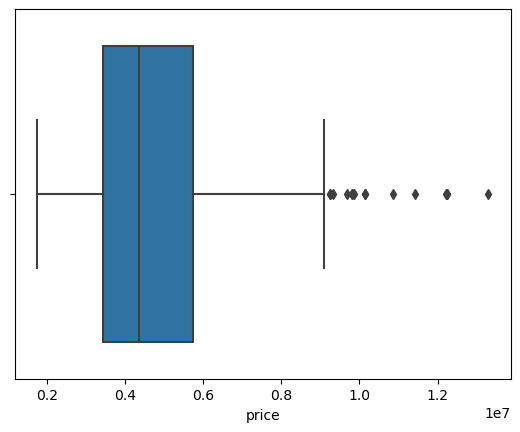

In [28]:
#Checking outliers of the Numerical attributes using a Box Plot
#Price Attribute
sns.boxplot(data['price'])

C:\Users\prabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

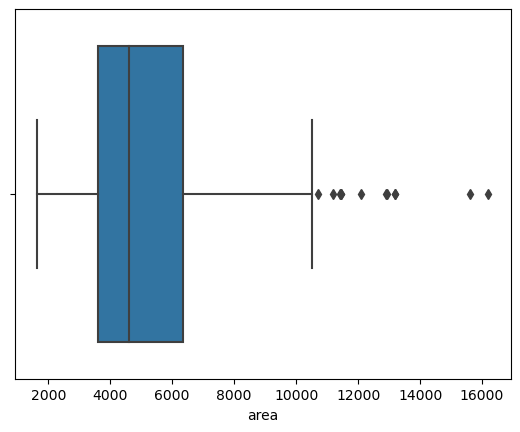

In [29]:
#Area Attribute
sns.boxplot(data['area'])

In [30]:
#Outliers identified in both the attributes
#Handling Outliers
#Price Attribute
q1 = data['price'].quantile(0.25)
q2 = data['price'].quantile(0.75)
Inter_Quartile_Range = q2 - q1
whisker_width = 1.5
lower_whisker = q1 -(whisker_width*Inter_Quartile_Range)
upper_whisker = q2 + (whisker_width*Inter_Quartile_Range)
data['price']=np.where(data['price']>upper_whisker,upper_whisker,np.where(data['price']<lower_whisker,lower_whisker,data['price']))

C:\Users\prabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

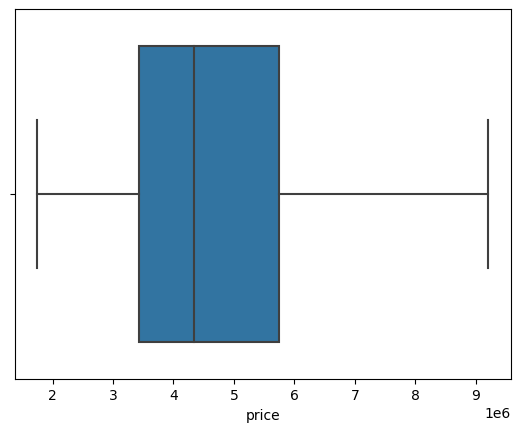

In [31]:
#After removing Outliers in Price Attribute
sns.boxplot(data['price'])

In [32]:
#Handling Outliers
#Area Attribute
q1 = data['area'].quantile(0.25)
q2 = data['area'].quantile(0.75)
Inter_Quartile_Range = q2 - q1
whisker_width = 1.5
lower_whisker = q1 -(whisker_width*Inter_Quartile_Range)
upper_whisker = q2 + (whisker_width*Inter_Quartile_Range)
data['area']=np.where(data['area']>upper_whisker,upper_whisker,np.where(data['area']<lower_whisker,lower_whisker,data['area']))

C:\Users\prabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

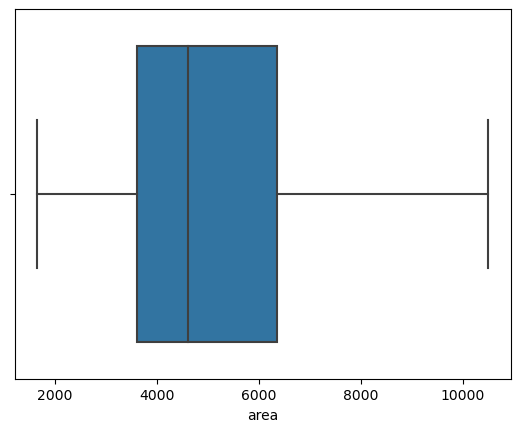

In [33]:
#After removing outliers in Area Attribute
sns.boxplot(data['area'])

## 7. Check for Categorical columns and perform encoding.


In [34]:
#Identify Categorical columns
categ_cols=data.select_dtypes(include=['object']).columns
print('Categorical Columns: ', categ_cols)

Categorical Columns:  Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')


In [35]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in categ_cols:
    data[col]=le.fit_transform(data[col])

In [36]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,9205000.0,7420.0,4,2,3,1,0,0,0,1,2,0
1,9205000.0,8960.0,4,4,4,1,0,0,0,1,3,0
2,9205000.0,9960.0,3,2,2,1,0,1,0,0,2,1
3,9205000.0,7500.0,4,2,2,1,0,1,0,1,3,0
4,9205000.0,7420.0,4,1,2,1,1,1,0,1,2,0


## 8. Split the data into dependent and independent variables.

In [37]:
#Price Column is identified as the dependent variable
dep_var=data['price']
indep_var=data.drop('price', axis=1)

In [38]:
#Dependent Variables
print('Dependent Variables: \n',dep_var.head(0))

Dependent Variables: 
 Series([], Name: price, dtype: float64)


In [39]:
#Independent Variables
print('Independent Variables: \n',indep_var.head(0))

Independent Variables: 
 Empty DataFrame
Columns: [area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, furnishingstatus]
Index: []


## 9. Scale the independent variables


In [40]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
indep_scaled=scale.fit_transform(indep_var)

In [41]:
indep_scaled_data=pd.DataFrame(indep_scaled, columns=indep_var.columns)
indep_scaled_data.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,1.156583,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,-1.406286
1,1.925060,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-1.406286
2,2.424072,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.091662
3,1.196504,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,-1.406286
4,1.156583,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-1.406286


## 10. Split the data into training and testing

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(indep_scaled_data, dep_var, test_size=0.2, random_state=42)

In [46]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (436, 11)
Shape of x_test: (109, 11)
Shape of y_train: (436,)
Shape of y_test: (109,)


## 11. Build the Model

#### Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

## 12. Train the Model

In [49]:
#Training the model
lr.fit(x_train, y_train)

LinearRegression()

## 13. Test the Model

In [52]:
#Testing the model
y_pred = lr.predict(x_test)
y_pred

array([5215154.81060095, 6675719.70641621, 3210585.63155314,
       4719348.1216706 , 3494112.11179584, 3844003.45060721,
       5837299.87684943, 5957697.38811311, 2745391.27972497,
       2658153.41177725, 8841079.55503709, 2979167.86492965,
       3173184.08483981, 3428370.56772898, 3955248.50258283,
       5067043.6022799 , 3052057.38643865, 4966513.49574211,
       4645490.66042896, 3746569.7059927 , 5321051.93476343,
       5554281.0446497 , 2901231.40512594, 4356163.12821942,
       5457165.80164233, 7092398.39430059, 3483565.40870114,
       5310536.96736101, 7242016.7003042 , 3527949.52170957,
       5854233.74056216, 3435010.62044492, 6810257.13103388,
       4417053.62117231, 3814426.53386575, 5730514.68900455,
       4966077.2134742 , 4586121.05305665, 3210525.89028568,
       4620063.37759807, 4743265.48292833, 3639970.08052502,
       6653842.80541868, 4135210.52951514, 3951665.65284458,
       4432760.21179709, 6735890.93270247, 4156075.12063828,
       4104734.42125273,

## 14. Measure the performance using Metrics

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
#Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('MSE of the Model = ', mse) 

MSE of the Model =  1340722973330.946


In [56]:
#R2 Score
r2 = r2_score(y_test, y_pred)
print('R2 Score of the Model = ', r2)

R2 Score of the Model =  0.6681289959808647
